![image info](https://ineuron.ai/images/ineuron-logo.png)

## 1. Problem Statement:
- Hence, the goal is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. Which countries should receive funding and why?

In [56]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

# import PCA 
from sklearn.decomposition import PCA,IncrementalPCA
import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/Country-data.csv')

#### Show Top 5 Records

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Feature Description
- country: Name of the country
- child_mort: Death of children under 5 years of age per 1000 live births
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- health: Total health spending per capita. Given as %age of GDP per capita
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

In [4]:
X = df.drop(['country'], axis =1)
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Using StandardScaler (Standardization) for scaling purpose¶

In [79]:
columns = X.columns
scaler = StandardScaler()
scaled_std_scaler = scaler.fit_transform(X)
scaled_std_scaler

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  1.90288227,
        -0.67917961,  0.37070186],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.85997281,
        -0.48562324, -0.89271061],
       [-0.27283273, -0.09912164, -0.96607302, ..., -0.0384044 ,
        -0.46537561, -0.89271061],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ..., -0.66120626,
        -0.63775406, -0.89271061],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.14094382,
        -0.63775406,  0.37070186],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  1.6246091 ,
        -0.62954556,  0.37070186]])

#### Using MinMaxScaler (normalization) for scaling purpose

In [80]:
columns = X.columns
scaler = MinMaxScaler()
scaled_minmax = scaler.fit_transform(X)
scaled_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.73659306, 0.00307343,
        0.5       ],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.07886435, 0.03683341,
        0.        ],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.27444795, 0.04036499,
        0.        ],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.12618297, 0.01029885,
        0.        ],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.55520505, 0.01029885,
        0.5       ],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.670347  , 0.01173057,
        0.5       ]])

#### Create a new dataframe with the column lables and the scaled values

In [81]:
df_minmax = pd.DataFrame(data= scaled_minmax , columns = columns )
df_std_scaler = pd.DataFrame(data= scaled_std_scaler , columns = columns )

####  PCA: Principal Component Analysis

In [8]:
# fit and transform
pca = PCA()
pca.fit(df_std_scaler)
pca_data_standard = pca.transform(df_std_scaler)
print('Total no. of principal components =',pca.n_components_)

Total no. of principal components = 9


In [9]:
#Print Principal Components
print('Principal Component Matrix :\n',pca.components_)

Principal Component Matrix :
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02

#### The amount of variance that each Principle  explains

In [10]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


In [11]:
percentage_variation = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC_variation' + str(x) for x in range (1, len(percentage_variation)+1)]

#### PCA with data scaled with StandardScaler

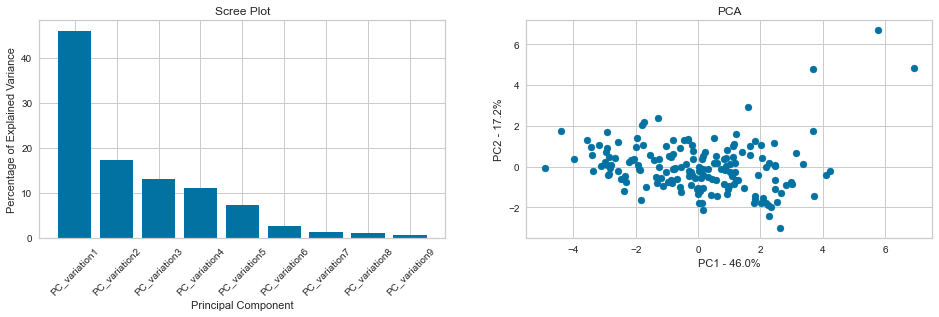

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(x=range(1,len(percentage_variation)+1), height=percentage_variation, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=45)

plt.subplot(122)
# plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
plt.scatter(pca_df_standard.PC_variation1, pca_df_standard.PC_variation2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(percentage_variation[0]))
plt.ylabel('PC2 - {0}%'.format(percentage_variation[1]))

plt.show()

#### The variance explained by first and second principal components are nearly 46% and 17% respectively

#### PCA with data scaled with MinMaxScaler

In [13]:
# fit and transform
pca = PCA()
pca.fit(df_minmax)
pca_data_minmax = pca.transform(df_minmax)

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC_variation' + str(x) for x in range (1, len(per_var)+1)]

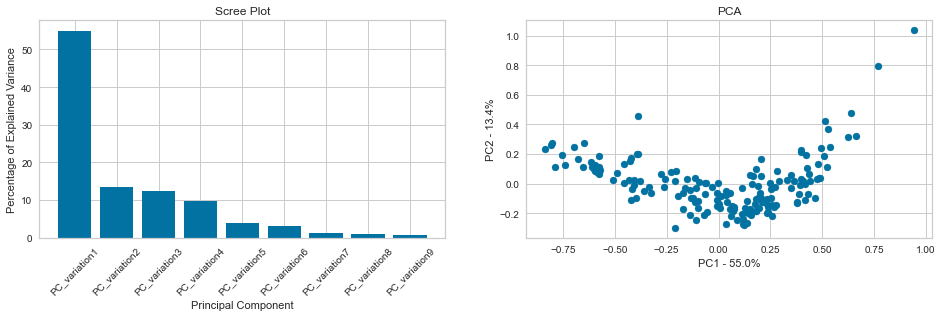

In [14]:
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.xticks(rotation=45)

plt.subplot(122)
# plot pca
pca_df_minmax = pd.DataFrame(pca_data_minmax, columns = labels)
plt.scatter(pca_df_minmax.PC_variation1, pca_df_minmax.PC_variation2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

plt.show()

#### Insights
- We can see that there are 4 principal components can explain about 90% of the distribution of the original data.

In [15]:
pca_data = pca_df_standard.drop(['PC_variation5','PC_variation6','PC_variation7','PC_variation8','PC_variation9'], axis = 1)

#### K- Means Clustering
**K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm. It uses Euclidean distance between clusters in each iteration to decide a data point should belong to which cluster, and proceed accordingly.**

  - First we initialize k points called means randomly
  - Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
  - We repeat the process for a given number of iteartions and at the end,we have our clusters

In [16]:
kmeans = KMeans (
    n_clusters = 3, 
    init = 'random',
    n_init = 10,
    max_iter = 300,
    tol = 1e-4,
    random_state = 0
)

In [17]:
y_predicted_minmax = kmeans.fit_predict(df_minmax) 

In [18]:
y_predicted_standard_scaled = kmeans.fit_predict(df_std_scaler) # fit_predict --> Compute cluster centers and predict cluster index for each sample.

In [19]:
y_predicted_pca_data = kmeans.fit_predict(pca_data) # fit_predict --> Compute cluster centers and predict cluster index for each sample.

In [82]:
df_minmax['clusters'] = y_predicted_minmax
df_std_scaler['clusters'] = y_predicted_standard_scaled
X['clusters'] = y_predicted_pca_data

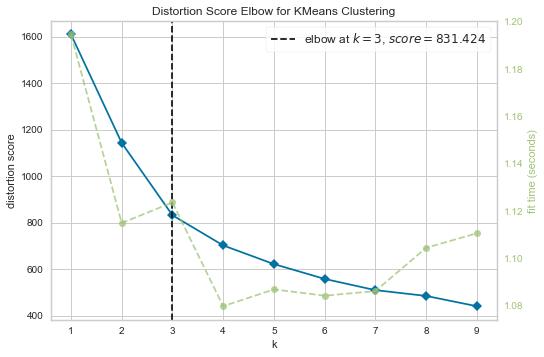

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_std_scaler)    
visualizer.poof()

#### After running the K-Means model with the a Standardized dataset,  the optimal number of clusters is  3.

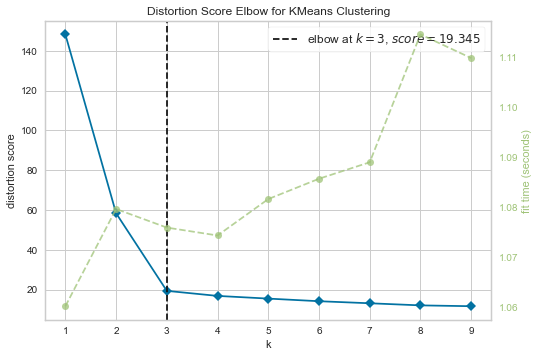

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_minmax)    
visualizer.poof()

#### After running the K-Means model with the a normalized dataset,  the optimal number of clusters is  3.

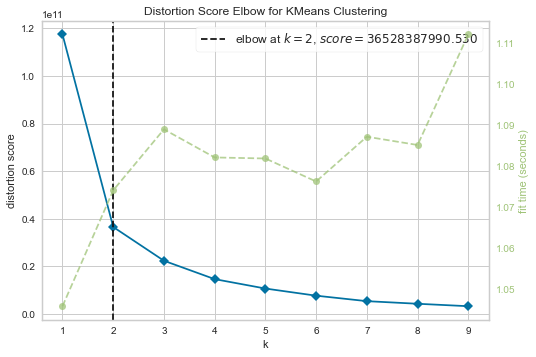

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X)    
visualizer.poof()

#### After running the K-Means model on PCA with 4 components, the optimal number of clusters is  4.

#### We are interested to check how good is our K-Means clustering model. 
- Silhouette Coefficient is one such metric to check that. The Silhouette Coefficient is calculated using:
- the mean intra-cluster distance ( a ) for each sample
- the mean nearest-cluster distance ( b ) for each sample
- The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [24]:
# calculate Silhoutte Score - stardardised
score = silhouette_score(df_std_scaler, kmeans.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.336


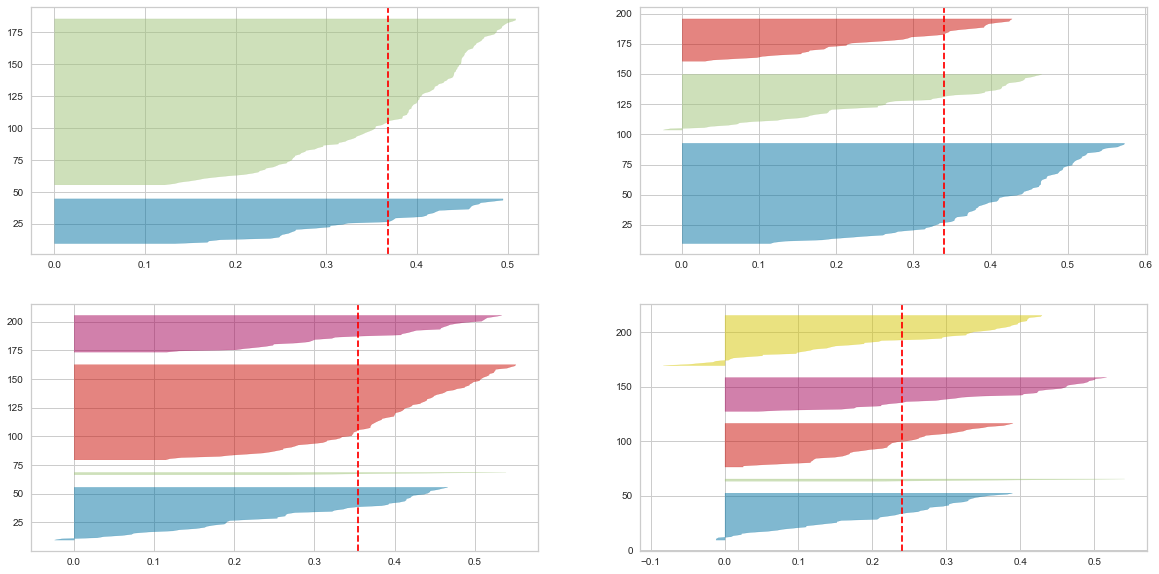

In [25]:
fig,ax = plt.subplots(2,2, figsize = (20,10))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_std_scaler)

In [26]:
# Calculate Silhoutte Score - normalised
score = silhouette_score(df_minmax, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# # A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.336


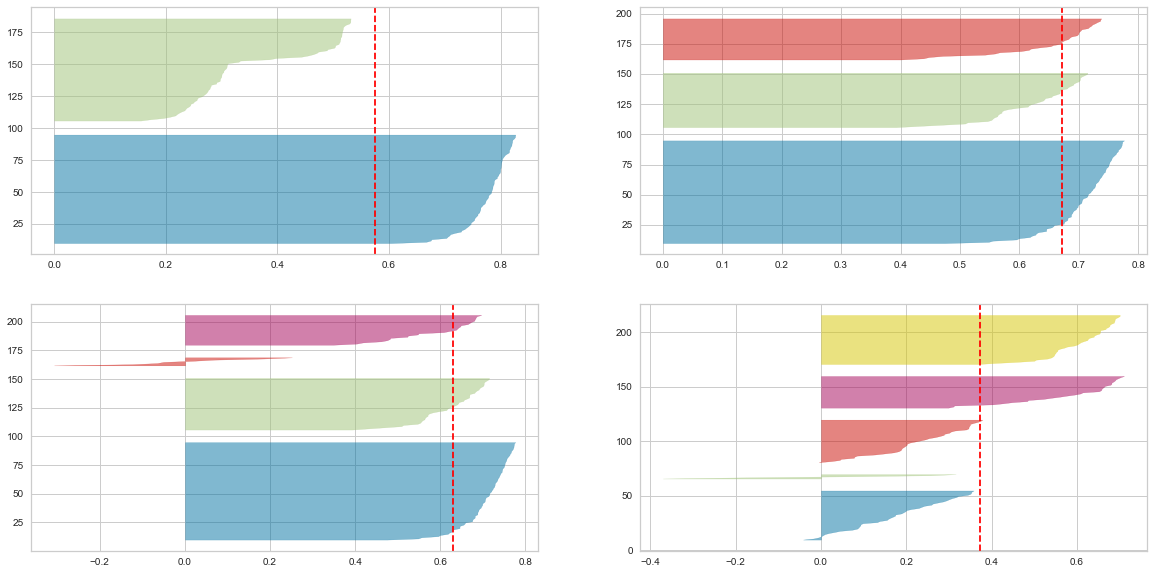

In [27]:
fig,ax = plt.subplots(2,2, figsize = (20,10))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_minmax)

In [28]:
# Calculate Silhoutte Score - stardardised + PCA
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.174


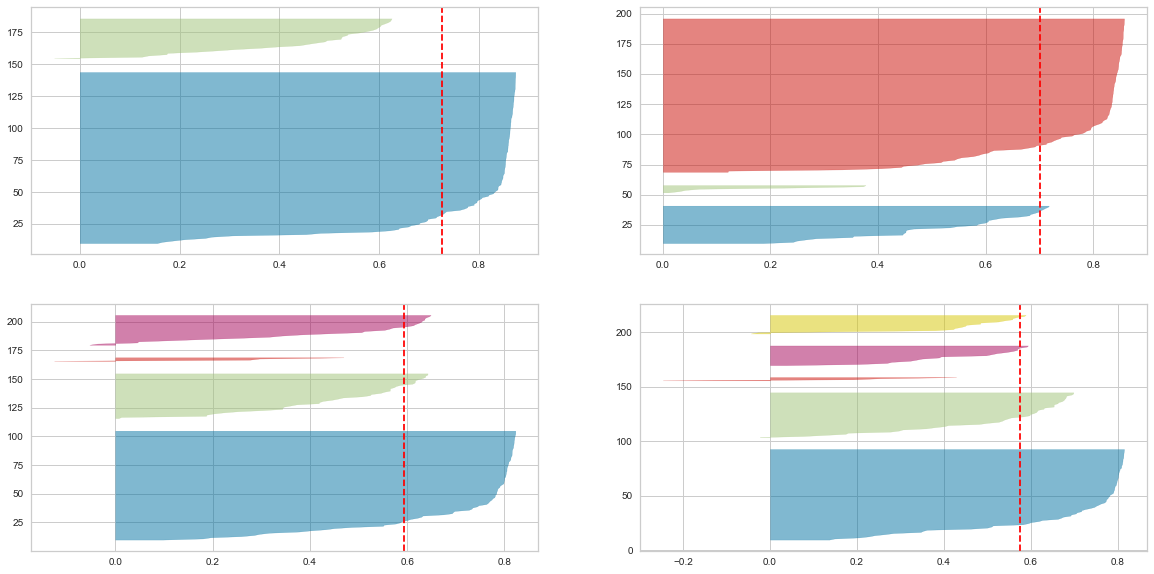

In [29]:
fig,ax = plt.subplots(2,2, figsize = (20,10))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

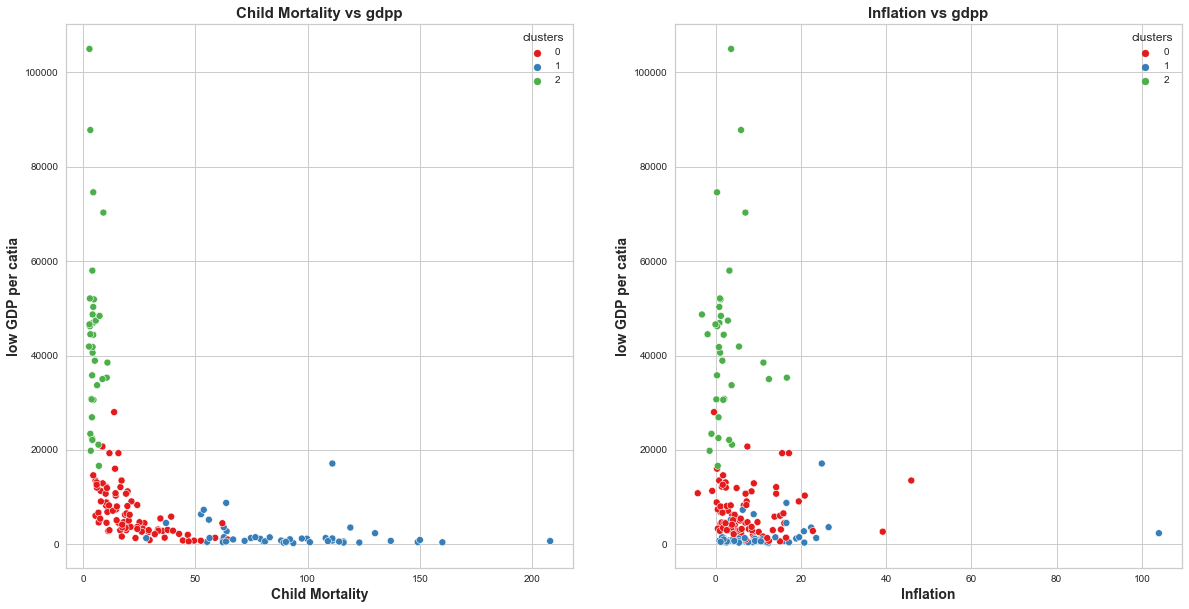

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.scatterplot(X['child_mort'],X['gdpp'],hue='clusters',data=X,palette='Set1') 
plt.title("Child Mortality vs gdpp", fontsize=15,weight="bold")
plt.xlabel("Child Mortality", fontsize=14, weight="bold")
plt.ylabel("low GDP per catia", fontsize=14,weight="bold")

plt.subplot(122)
sns.scatterplot(X['inflation'],X['gdpp'],hue='clusters',data=X,palette='Set1') 
plt.title("Inflation vs gdpp", fontsize=15,weight="bold")
plt.xlabel("Inflation", fontsize=14,weight="bold")
plt.ylabel("low GDP per catia", fontsize=14,weight="bold")
plt.show()


#### Insights 
- Country having high child-mortality, low GDP per catia and low inflation.[cluster 0]
- Cluster 1 = Developing country
- Country having low child-mortality, high GDP per catia and high infaltion is the developed country.[cluster 2]

#### Hierarchical Clustering
 - Is is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering from top to bottom.
     *  Divisive Hierarchical Clustering
         -  In divisive (top-down) clustering method, all observations are assigned to a single cluster and then that cluster is partitioned to two least similar clusters, and then those two clusters are partitioned again to multiple clusters, and thus the process go on
     *  Agglomerative Hierarchical Clustering
         -  In agglomerative (bottom-up), the opposite approach is followed. Here, the ideal no. of clusters is decided by dendrogram.

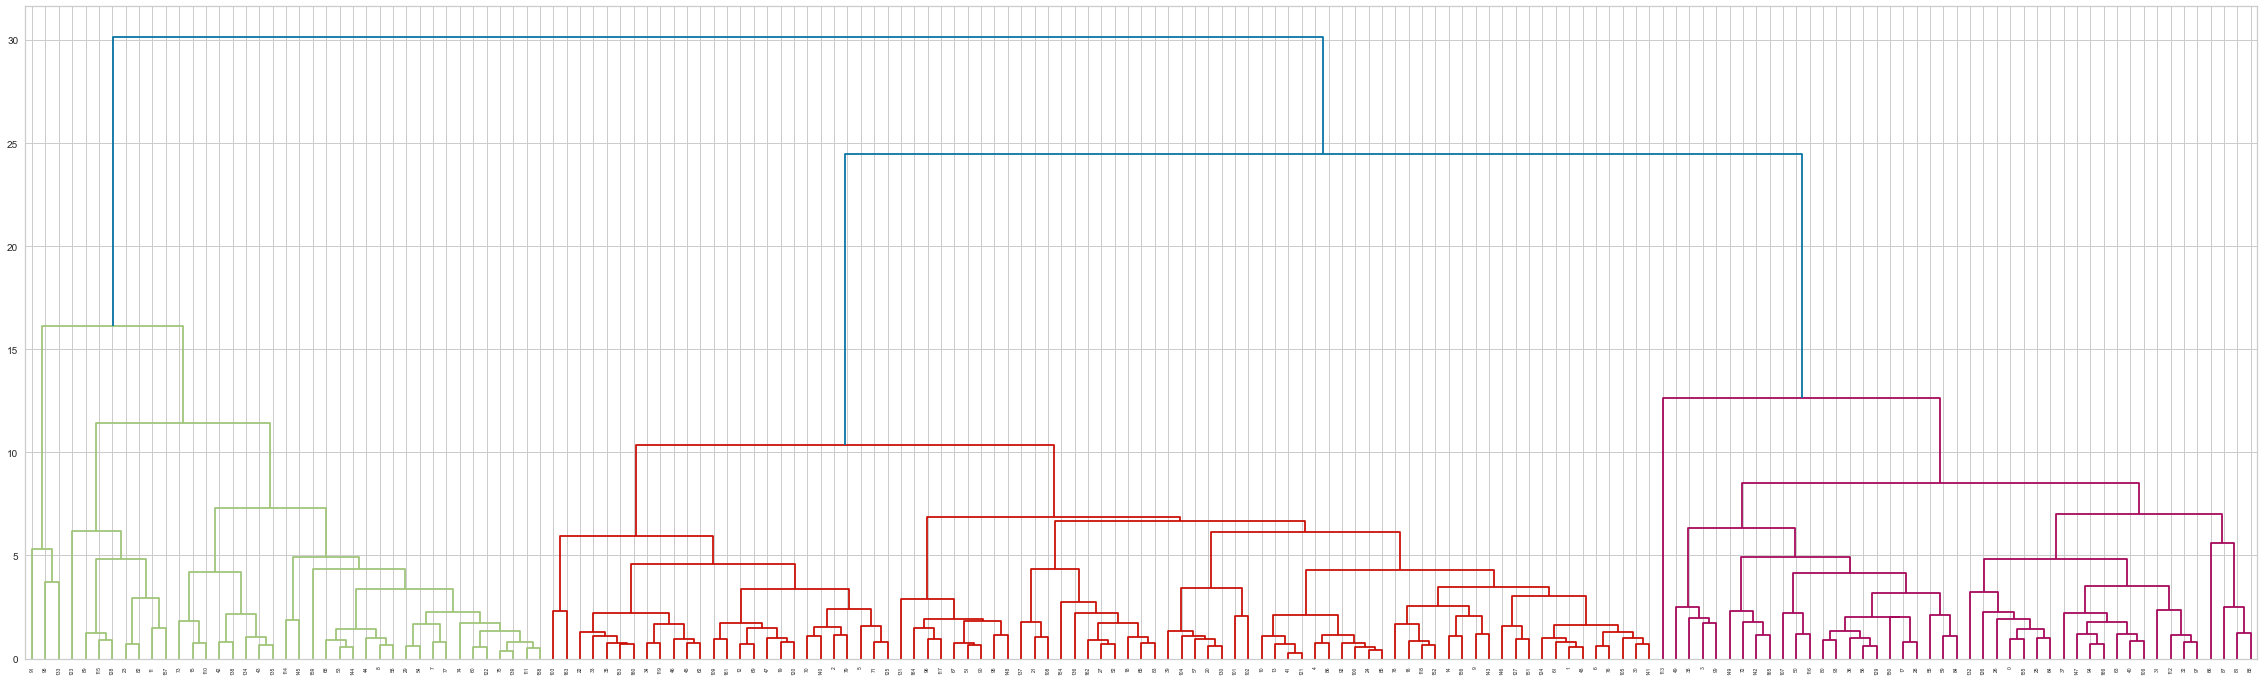

In [31]:
#plotting dendogram
plt.figure(figsize=(40, 12))
dend=hcluster.dendrogram(hcluster.linkage(df_std_scaler,method='ward'))

In [32]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(df_std_scaler)
hcluster_label = hcluster.labels_

In [33]:
hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [49]:
# Droping string feature country name.
features=df.drop('country',1) 

#creating scaler object 
standard_scaler = StandardScaler()
features_scaled = standard_scaler.fit_transform(features)

In [50]:
#creating pca object
pca = PCA(svd_solver='randomized', random_state=42)
# fiting PCA on the dataset
pca.fit(features_scaled)
#checking components
print("{} pca components.\nList of components\n{}".format(pca.n_components_,pca.components_))

10 pca components.
List of components
[[-3.91517067e-01  2.78762080e-01  1.57510896e-01  1.51337456e-01
   4.10419730e-01 -1.84524379e-01  4.08763508e-01 -3.74390079e-01
   4.08682587e-01 -2.11004230e-01]
 [ 3.85038978e-01  8.97635252e-02  9.77487875e-02 -1.71186509e-02
   2.80832967e-01  1.54461209e-01 -2.33035303e-01  3.97134058e-01
   3.30323375e-01 -6.40296616e-01]
 [ 1.17735216e-01  6.05931092e-01 -2.69505563e-01  6.89862276e-01
  -3.89825757e-02 -4.23284390e-02 -1.80302897e-01  7.66531833e-02
  -1.19313846e-01  1.20460558e-01]
 [-9.96955869e-02  1.47082897e-01 -6.58570016e-01 -2.75915239e-01
   2.29373392e-01  6.14473789e-01  1.50615239e-01 -5.35442681e-02
   3.02265196e-02  4.39084758e-02]
 [-7.42603600e-02  6.86292385e-02  6.04505187e-01  2.21353593e-01
  -1.12854301e-01  7.36478487e-01  5.06153619e-02 -4.69749810e-02
  -1.71479090e-02  1.23094366e-01]
 [ 2.57996883e-01 -7.72149743e-05  8.72251301e-02 -1.17613432e-01
   3.83003968e-01 -1.11667837e-02 -5.35910686e-01 -3.46841786

In [51]:
#The amount of variance that each Principle  explains
var = pca.explained_variance_ratio_
print(var)

[0.42818785 0.16149411 0.15437473 0.11656046 0.06819451 0.02601155
 0.01858552 0.01133502 0.00868756 0.00656871]


The cumulative variance of the first 5 principal components is 0.92881


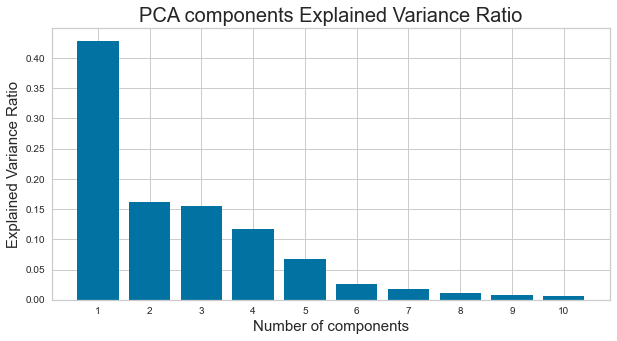

In [52]:
#creating variable for no. of components
comp=range(1,pca.n_components_+1)
#cumulative variance of the first 5 principal components
print("The cumulative variance of the first 5 principal components is {}".format(round(pca.explained_variance_ratio_.cumsum()[4],5)))
#plotting barplot for pca components' explained variance ratio
plt.figure(figsize=(10,5))
plt.bar(comp,pca.explained_variance_ratio_)
plt.xticks(comp)
plt.title('PCA components Explained Variance Ratio',fontsize=20)
plt.xlabel('Number of components',fontsize=15)
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.show()

#### Around 95% of the information is being explained by 5 components, Hence creating dataframe of first 5 PCA Components

In [54]:
col_names = list(features.columns)
pca_data = pd.DataFrame({ 'Columns':col_names,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4]})

In [57]:
#Finally let's go ahead and do dimensionality reduction using the 5 Principal Components
#using Incremental PCA over normal PCA will use less Memory.
incremental_pca = IncrementalPCA(n_components=5)
incremental_pca = incremental_pca.fit_transform(features_scaled)
ipcat = np.transpose(incremental_pca)
pca_data = pd.DataFrame({'PC1':ipcat[0],'PC2':ipcat[1],'PC3':ipcat[2],'PC4':ipcat[3],'PC5':ipcat[4]})

In [58]:
#creating list ks for no. of clusters
ks=list(range(1,10))
plt.figure(figsize=(10,5))
ssd = []
#iterating ks values and fitting each value to the kmeans model
for num_clusters in ks:
    model = KMeans(n_clusters = num_clusters, max_iter=50)
    model.fit(pca_data.iloc[:,:5])
    ssd.append(model.inertia_)

<Figure size 720x360 with 0 Axes>

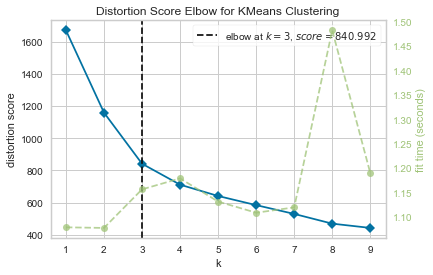

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(features_scaled)    
visualizer.poof()

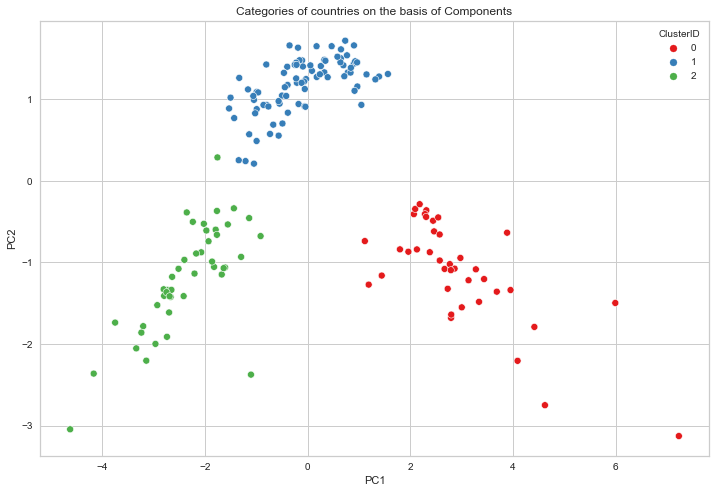

In [60]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
kmeans.fit(pca_data.iloc[:,:5])
#adding produced labels to pca_data 
pca_data['ClusterID']= pd.Series(kmeans.labels_)
fig = plt.figure(figsize = (12,8))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=pca_data,palette="Set1")
plt.title('Categories of countries on the basis of Components')
plt.savefig('Kmeans pca scatter.png')
plt.show()

#### Insights
From above plots, we can clearly see the 3 clusters .

In [61]:
final_df=pd.merge(df,pca_data.loc[:,'ClusterID'], left_index=True,right_index=True)

In [62]:
#calculating mean of the required columns(child_mort, income, gdpp) for comparison
Cluster_GDPP=pd.DataFrame(final_df.groupby(["ClusterID"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(final_df.groupby(["ClusterID"]).child_mort.mean())
Cluster_income=pd.DataFrame(final_df.groupby(["ClusterID"]).income.mean())
K_mean_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income], axis=1)
K_mean_df

,gdpp,child_mort,income
ClusterID,,,
0,40525.641026,5.743590,45243.589744
1,6168.602410,22.839759,11366.385542
2,1611.555556,94.920000,3450.066667


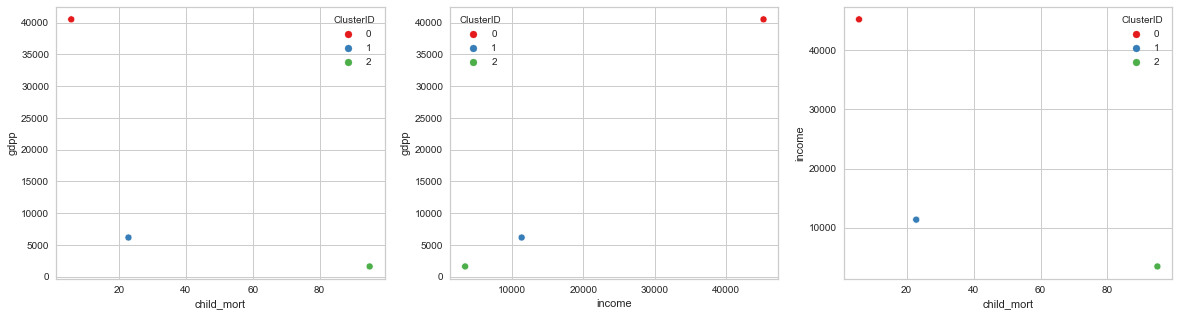

In [63]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

s=sns.scatterplot(x='child_mort',y='gdpp',data=K_mean_df,hue=K_mean_df.index,palette='Set1',ax=axes[0])
s=sns.scatterplot(x='income',y='gdpp',data=K_mean_df,hue=K_mean_df.index,palette='Set1',ax=axes[1])
s=sns.scatterplot(x='child_mort',y='income',data=K_mean_df,hue=K_mean_df.index,palette='Set1',ax=axes[2])
s.get_figure().savefig('comparison scatterplots.png')

#### Insights
- Countries with high gdpp and low child mortality are Developed countries
- Countries with low gdpp and low child mortality are Developing countries
- Countries with low gdpp and high child mortality are Under-developing countries
- ClusterID 0 = Developed countries
- ClusterID 1 = Under-developed countries
- ClusterID 2 = Developing countries

In [65]:
K_mean_df.rename(index={0: 'Developed'},inplace=True)
K_mean_df.rename(index={1: 'Under-developed'},inplace=True)
K_mean_df.rename(index={2: 'Developing'},inplace=True)

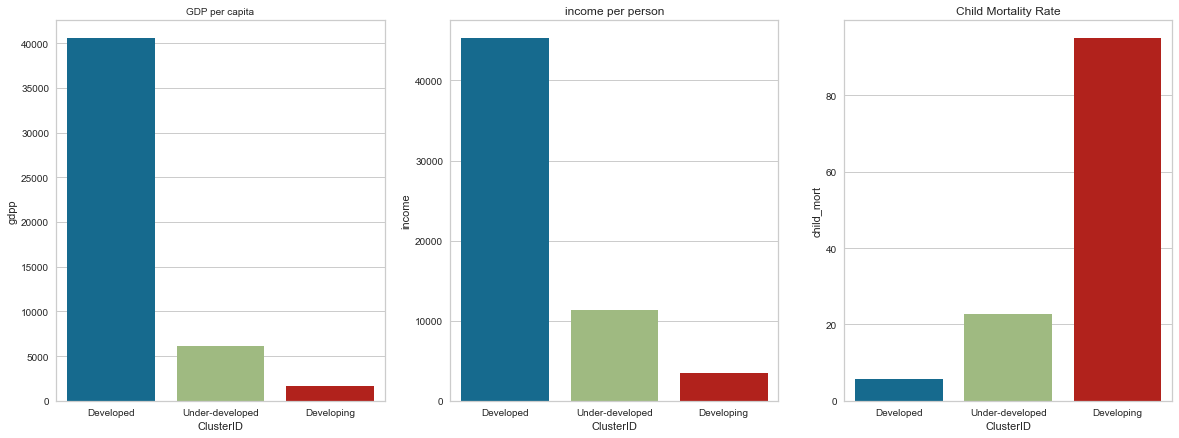

In [66]:
f, axes = plt.subplots(1, 3, figsize=(20,7))

s=sns.barplot(x=K_mean_df.index,y='gdpp',data=K_mean_df,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=10)

s=sns.barplot(x=K_mean_df.index,y='income',data=K_mean_df,ax=axes[1])
axes[1].set_title('income per person')

s=sns.barplot(x=K_mean_df.index,y='child_mort',data=K_mean_df,ax=axes[2])
axes[2].set_title('Child Mortality Rate')

s.get_figure().savefig('comparison subplots.png')
plt.show()

#### Insights
- All the developed countries are having high GDP per capita values, developing countries are having average GDP per capita values and poor countries are having the least GDPP values.
- All the developed countries are having high income per person, developing countries are having average income per person and poor countries are having the least income per person.
- All the developed countries are having low number of death of children, developing countries are having average death rate and poor countries are having the least death rate.

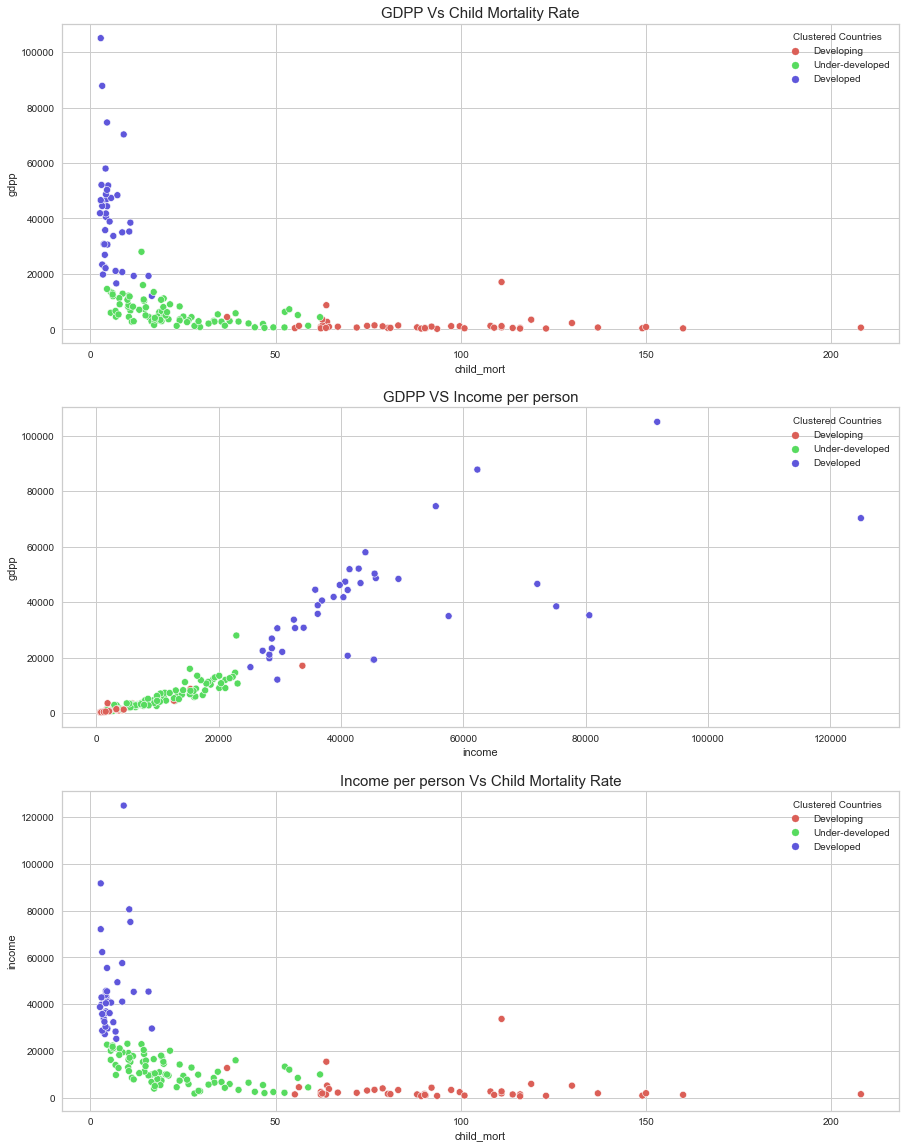

In [68]:
for i,cluster in enumerate(final_df.ClusterID):
    if(cluster==0):
        final_df.loc[i,'Clustered Countries']='Developed'
    elif(cluster==1):
        final_df.loc[i,'Clustered Countries']='Under-developed'
    else:
        final_df.loc[i,'Clustered Countries']='Developing'
f, axes = plt.subplots(3, 1, figsize=(15,20))
s=sns.scatterplot(x='child_mort',y='gdpp',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[0])
axes[0].set_title('GDPP Vs Child Mortality Rate',fontsize=15)
s=sns.scatterplot(x='income',y='gdpp',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[1])
axes[1].set_title('GDPP VS Income per person',fontsize=15)
s=sns.scatterplot(x='child_mort',y='income',hue='Clustered Countries',legend='full',data=final_df,palette=sns.color_palette("hls", 3),ax=axes[2])
axes[2].set_title('Income per person Vs Child Mortality Rate',fontsize=15)
s.get_figure().savefig('scatterplot subplots.png')
plt.show()

#### Insights
- In GDPP VS Income per person developed countries income is higher.

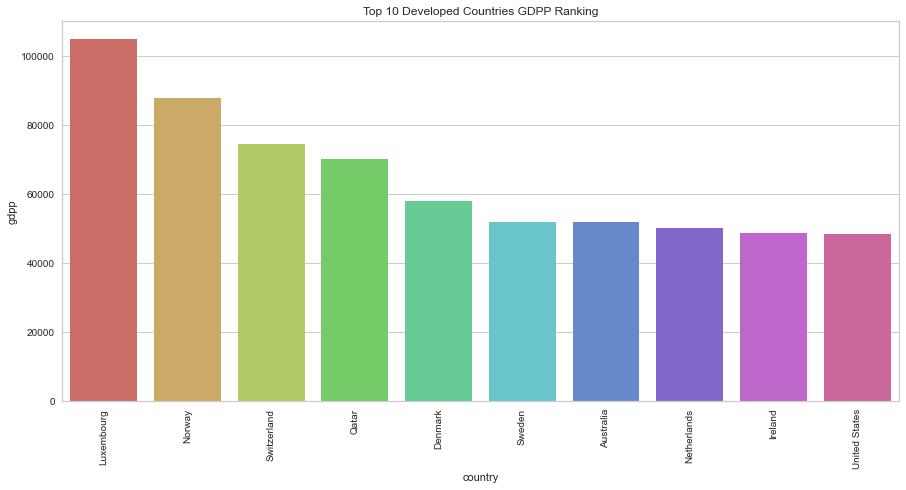

In [69]:
plt.figure(figsize=(15,7))
gdp_developed=final_df[final_df['Clustered Countries']=='Developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_developed[:10],palette='hls')
plt.title('Top 10 Developed Countries GDPP Ranking')
plt.xticks(rotation=90)
plt.show()

#### Insights
- Luxembourg is the most developed country in world

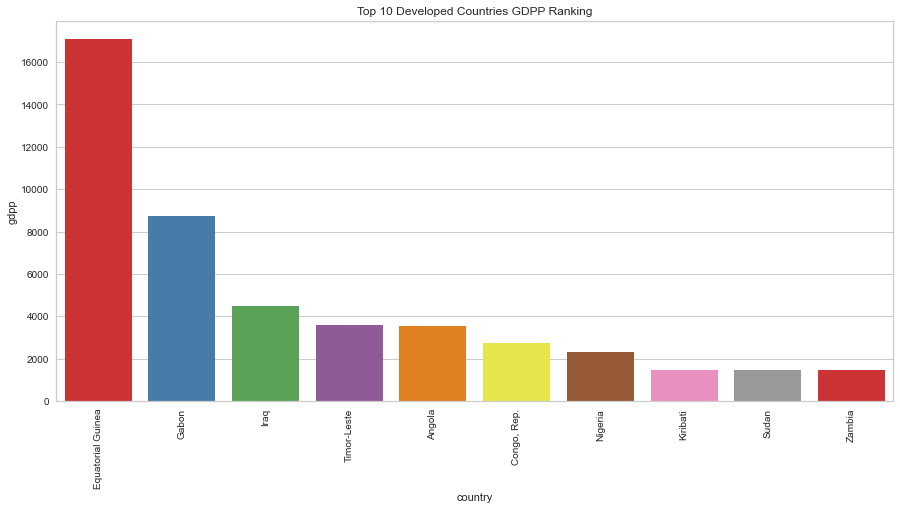

In [71]:
plt.figure(figsize=(15,7))
gdp_developing=final_df[final_df['Clustered Countries']=='Developing'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_developing[:10],palette='Set1')
plt.title('Top 10 Developed Countries GDPP Ranking')
plt.xticks(rotation=90)
plt.show()

#### Insights
- Bahamas is 1st developing country in world as per their gdp.

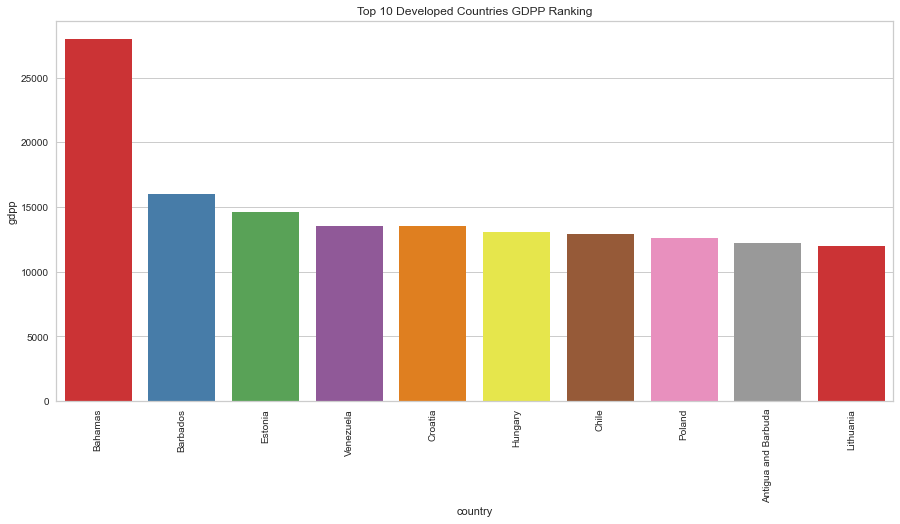

In [72]:
plt.figure(figsize=(15,7))
gdp_under = final_df[final_df['Clustered Countries']=='Under-developed'].sort_values(by='gdpp',ascending=False)
s=sns.barplot(x='country',y='gdpp',data=gdp_under[:10],palette='Set1')
plt.title('Top 10 Developed Countries GDPP Ranking')
plt.xticks(rotation=90)
plt.show()

#### Insights
- 'Equatorial Guinea' is the most under developed (poverty striken) country in world.

#### We'll select countries who's gdpp is less than 1909(mean gdpp), child mortality is > 92(mean child_mort) and income <=3897.35 and select top 10 countries

In [73]:
k_needy=df[df['gdpp']<=1909]
k_needy=k_needy[k_needy['child_mort']>= 92]
k_needy=k_needy[k_needy['income']<= 3897]
k_needy=pd.merge(k_needy,pca_data.loc[:,'ClusterID'],left_index=True,right_index=True)
k_needy=k_needy.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

#### Top 10 countries having need of aid based on overall conditions

In [75]:
print('\n Top 10 countries having need of aid based on overall conditions \n')
for countries in k_needy.country[:10]:
    print(countries)


 Top 10 countries having need of aid based on overall conditions 

Burundi
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Guinea-Bissau
Burkina Faso
Guinea
Haiti
